In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
# this is a lable algerathim that assign values to each unique values in the data

In [7]:
le =LabelEncoder() # stuoring the use of 'LabelEncoder'

In [10]:
# doing the encoder
df['cut_encode']= le.fit_transform (df.cut)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encode
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [19]:
df['cut_unen']= le.inverse_transform(df.cut_encode)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encode,cut_unen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,Ideal
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,Premium
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,Good
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,Premium
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,Good


In [24]:
df.drop('cut_unen', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encode
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


### Using Hot encoder
HotEncoder helps us to create an array for each category in a column and on each row, if class exist, it assigns 1 if it doesnt it assigns 0

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
oh=OneHotEncoder() # Saving the HotEncoder in sc variable to make it callable

In [29]:
oh.fit_transform(df[["cut"]]).toarray() # Transformaing the caracters in the cut column in df dataframe, into an array. 

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [35]:
ohot = pd.DataFrame((oh.fit_transform(df[["cut"]])).toarray()) #,columns=df.cut.unique()) 
#This is transforming the array into dataframe
ohot

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0


In [38]:
ohot = pd.DataFrame((oh.fit_transform(df[["cut"]])).toarray(),columns=df.cut.unique()) 
ohot # naming each variable with the unique class in the cut varaible. 

,Ideal,Premium,Good,Very Good,Fair
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0


In [40]:
x= ohot.get_feature_names

AttributeError: 'DataFrame' object has no attribute 'get_feature_names'

In [50]:
sample= ["The weather is is is is nice",
        "it's nice today",
        "today it got dark early"]

## Using count vectoriser

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vec= CountVectorizer()

In [51]:
X = vec.fit_transform(sample)

In [52]:
X # RETURNS AN ARRAY

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [53]:
# TO return x to df ang get the feature name in the text.
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,dark,early,got,is,it,nice,the,today,weather
0,0,0,0,4,0,1,1,0,1
1,0,0,0,0,1,1,0,1,0
2,1,1,1,0,1,0,0,1,0


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# research 'TfidfVectorizer()' and 'CountVectorizer()'

In [56]:
t_vec = TfidfVectorizer()

In [57]:
x = t_vec.fit_transform(sample)

In [58]:
pd.DataFrame(x.toarray(), columns =t_vec.get_feature_names_out())

,dark,early,got,is,it,nice,the,today,weather
0,0.000000,0.000000,0.000000,0.928017,0.000000,0.176445,0.232004,0.000000,0.232004
1,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.577350,0.000000
2,0.490479,0.490479,0.490479,0.000000,0.373022,0.000000,0.000000,0.373022,0.000000


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
x = np.array([1,2,3,4,5])
y= np.array([4,2,1,3,7])

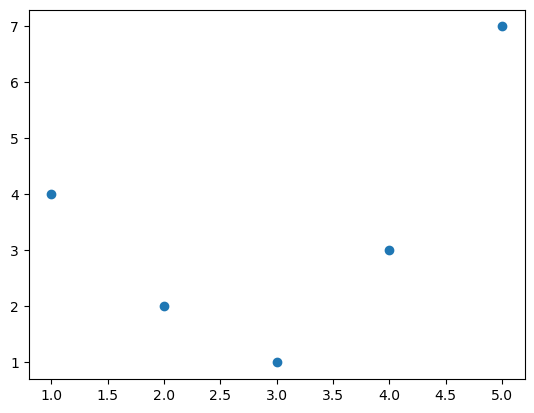

In [63]:
plt.scatter(x,y)

In [61]:
from sklearn.linear_model import LinearRegression 

In [64]:
X=x[:, np.newaxis] 

In [65]:
model =LinearRegression().fit(X,y)

In [67]:
y_predict= model.predict(X)

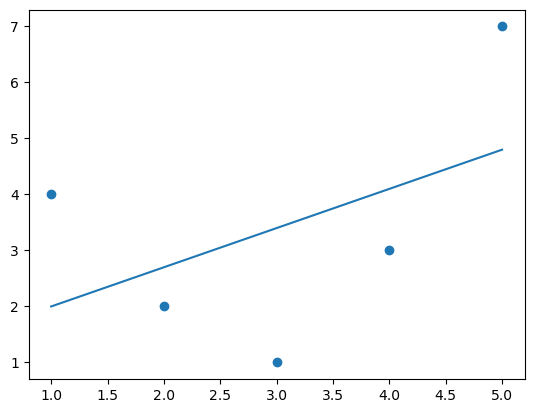

In [68]:
plt.scatter(x,y)
plt.plot(X, y_predict)

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(degree= 3, include_bias= False)
#1st degree = X
#2nd degree =X^2 
#3rd degree =X^3

In [76]:
X2 = poly.fit_transform(X) # Creates square of x and cube of x

In [77]:
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [78]:
model = LinearRegression().fit(X2, y)

In [79]:
yfit = model.predict(X2)

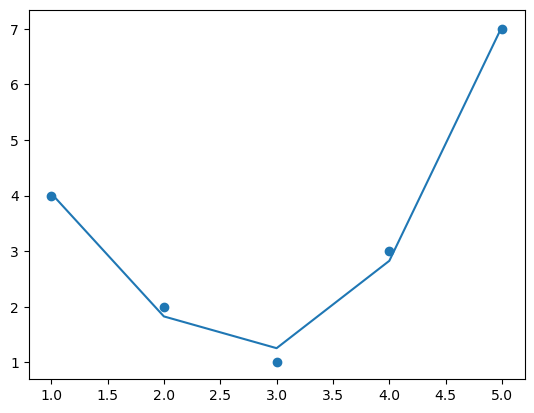

In [82]:
plt.scatter(X,y)
plt.plot(X, yfit)